In [1]:
library(ggplot2)

In [2]:
df <- data.frame(
    x = c(0, 0, 0, 0),
    y = c(1, 2, 3, 4),
    val = c(1, 2, 3, 10)
)

### Spoke `radius` is positional

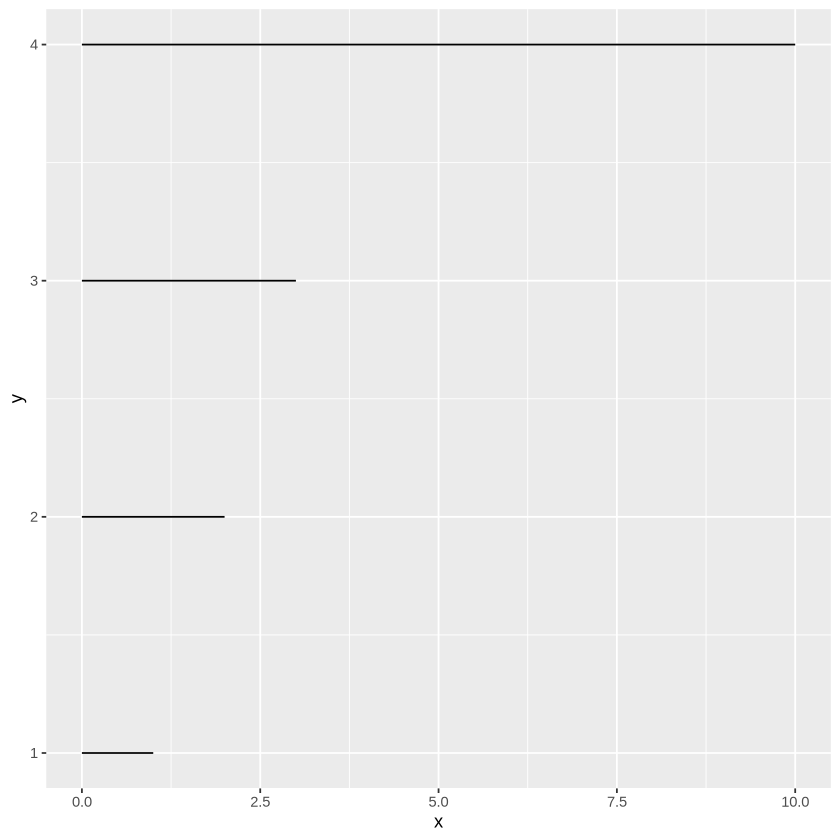

In [3]:
p <- ggplot(df, aes(x, y)) + geom_spoke(aes(radius = val), angle = 0)
p

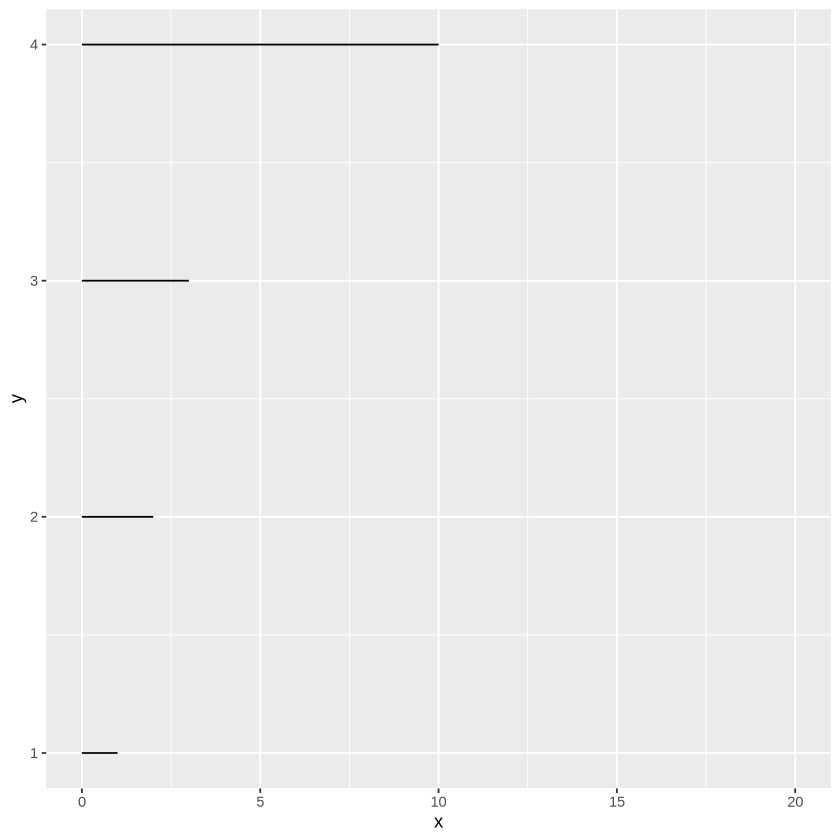

In [4]:
p + xlim(0, 20)

### How it works: `continuous_scale()` and `palette` parameter

In [5]:
getPalette <- function (a, b) {
    function (r) {
        function (x) {
            (x - min(x)) / diff(range(r)) * b + a
        }
    }
}

valPalette <- function (a, b) {
    getPalette(a, b)(df$val)
}

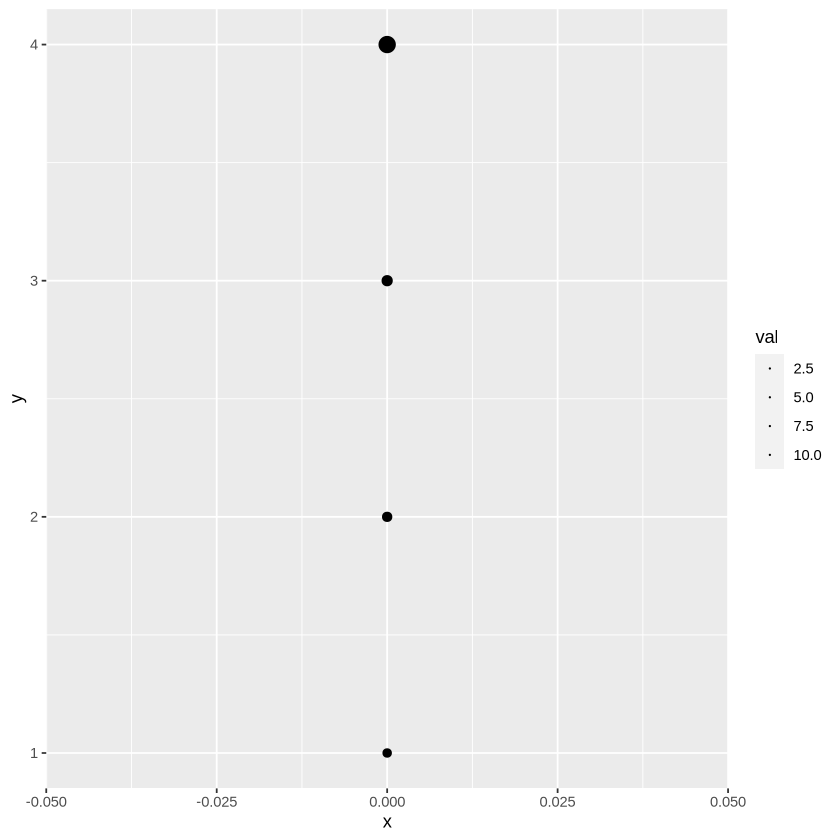

In [6]:
ggplot(df, aes(x, y)) +
    geom_point(aes(size = val)) +
    continuous_scale("size", "continuous", palette = valPalette(2, 20))

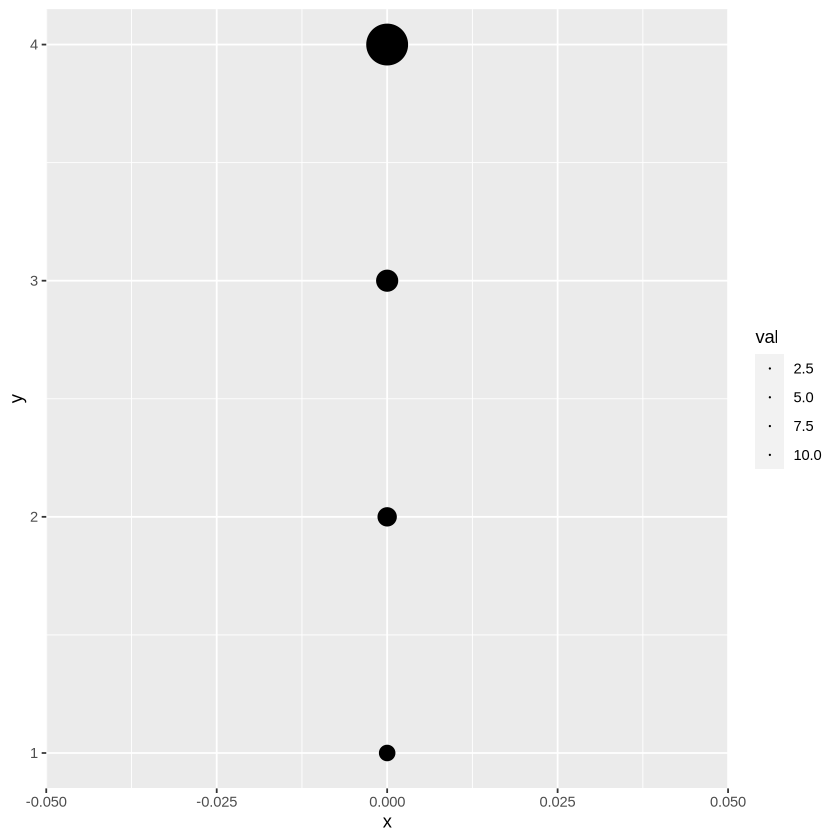

In [7]:
ggplot(df, aes(x, y)) +
    geom_point(aes(size = val)) +
    continuous_scale("size", "continuous", palette = valPalette(4, 64))

### Spoke `radius` with `continuous_scale()`

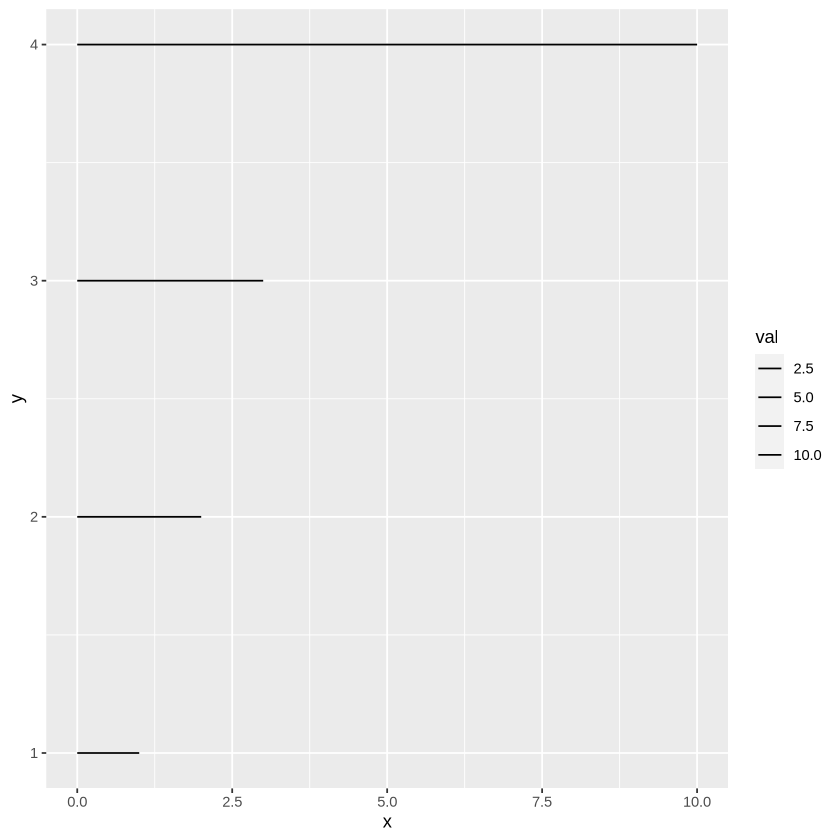

In [8]:
p + continuous_scale("radius", "continuous", palette = valPalette(2, 20))

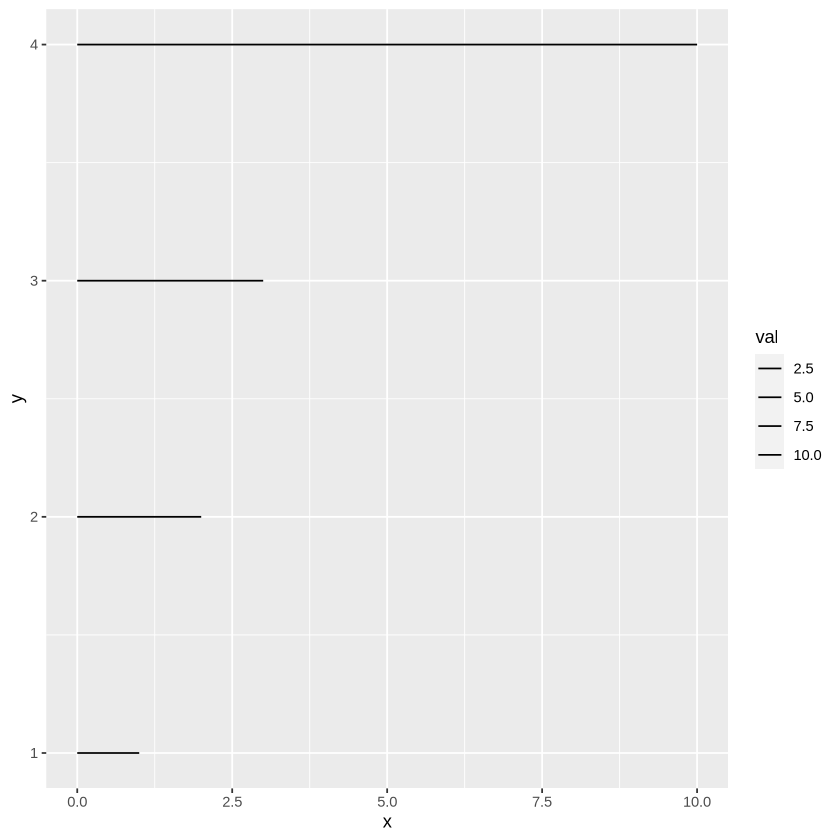

In [9]:
p + continuous_scale("radius", "continuous", palette = valPalette(4, 64))

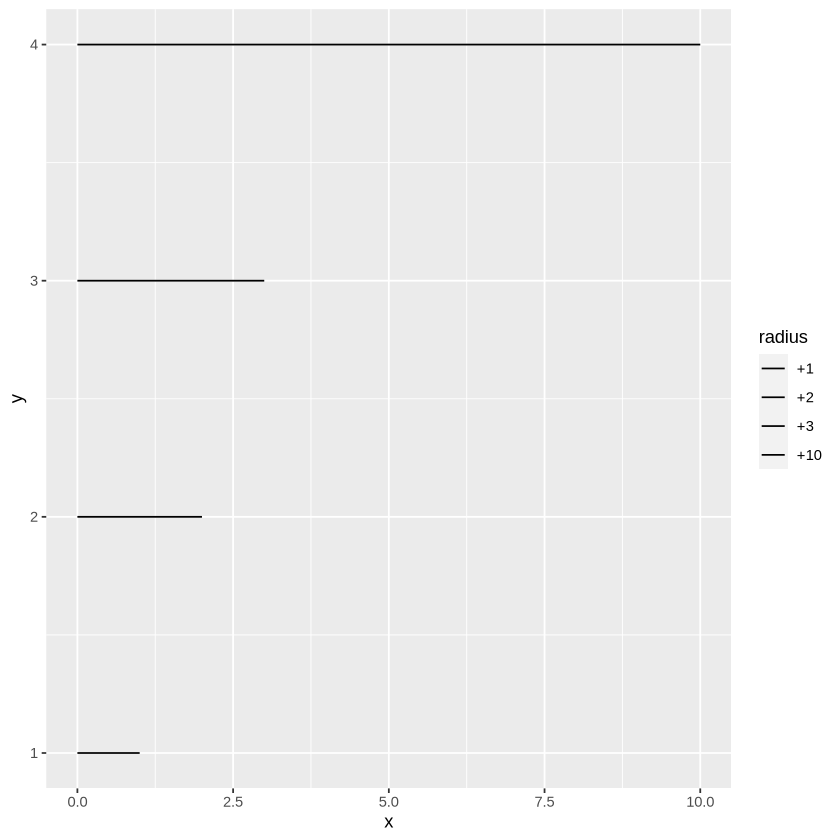

In [10]:
p + continuous_scale("radius", "continuous", palette = valPalette(4, 64), name = "radius", breaks = c(1, 2, 3, 10), labels = c("+1", "+2", "+3", "+10"))

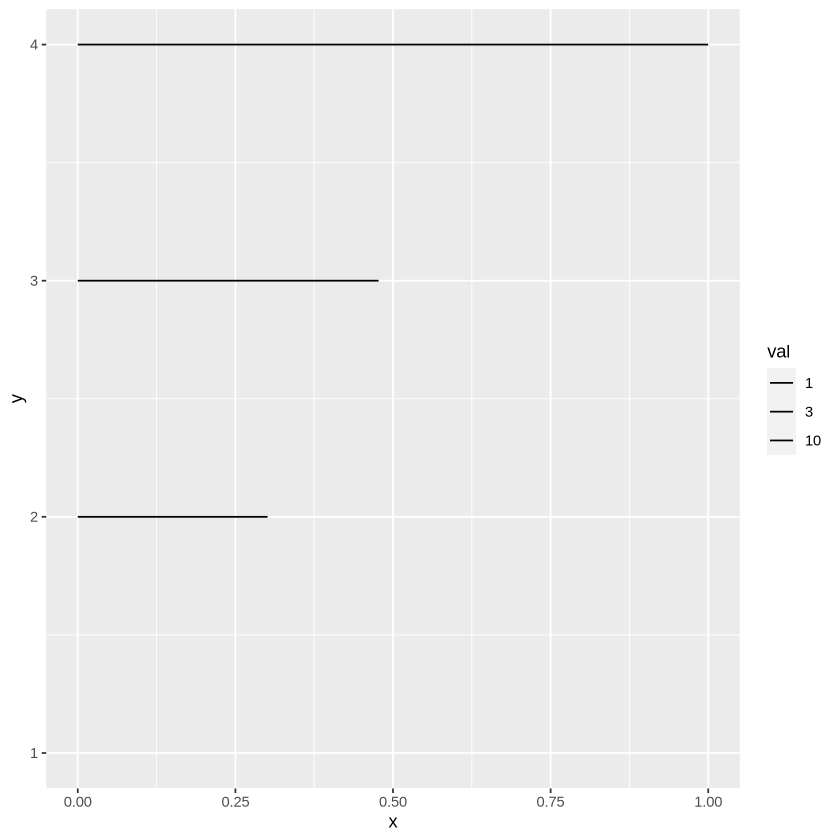

In [11]:
p + continuous_scale("radius", "continuous", palette = valPalette(4, 64), trans = "log10")

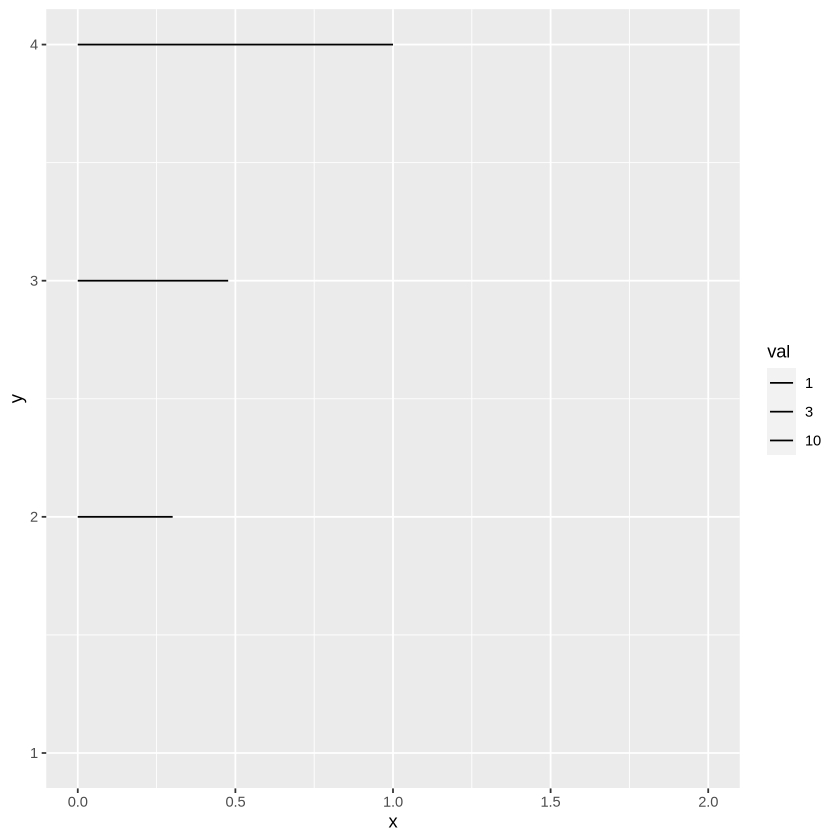

In [12]:
p + continuous_scale("radius", "continuous", palette = valPalette(4, 64), trans = "log10") + xlim(0, 2)